
# Colab 에서 실습을 진행하였습니다.

In [1]:
!pip install shap  # shap 설치

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.5 MB/s eta 0:00:00


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import shap

In [159]:
# Boston 집 값 데이터셋 가져오기.
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.columns = df.columns.str.upper()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


* CRIM: 자치시(town) 별 1인당 범죄율  
* ZN: 25,000 평방피트를 초과하는 거주지역의 비율  
* INDUS: 비소매상업지역이 점유하고 있는 토지의 비율  
* CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
* NOX: 10ppm 당 농축 일산화질소  
* RM: 주택 1가구당 평균 방의 개수  
* AGE: 1940년 이전에 건축된 소유주택의 비율  
* DIS: 5개의 보스턴 직업센터까지의 접근성 지수  
* RAD: 방사형 도로까지의 접근성 지수  
* TAX: 10,000 달러 당 재산세율  
* PTRATIO: 자치시(town)별 학생/교사 비율  
* B: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  
* LSTAT: 모집단의 하위계층의 비율(%)  
* MEDV: 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [180]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [181]:
# 학습용과 테스트용 데이터세트로 분리.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
325,0.19186,0.0,7.38,0,0.4930,6.431,14.7,5.4159,5,287,19.6,393.68,5.08
335,0.03961,0.0,5.19,0,0.5150,6.037,34.5,5.9853,5,224,20.2,396.90,8.01
56,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77
437,15.17720,0.0,18.10,0,0.7400,6.152,100.0,1.9142,24,666,20.2,9.32,26.45
409,14.43830,0.0,18.10,0,0.5970,6.852,100.0,1.4655,24,666,20.2,179.36,19.78


In [182]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [188]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
1,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
2,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
3,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
4,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
400,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
401,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
402,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


Text(0, 0.5, 'MEDV \n Price $1,000')

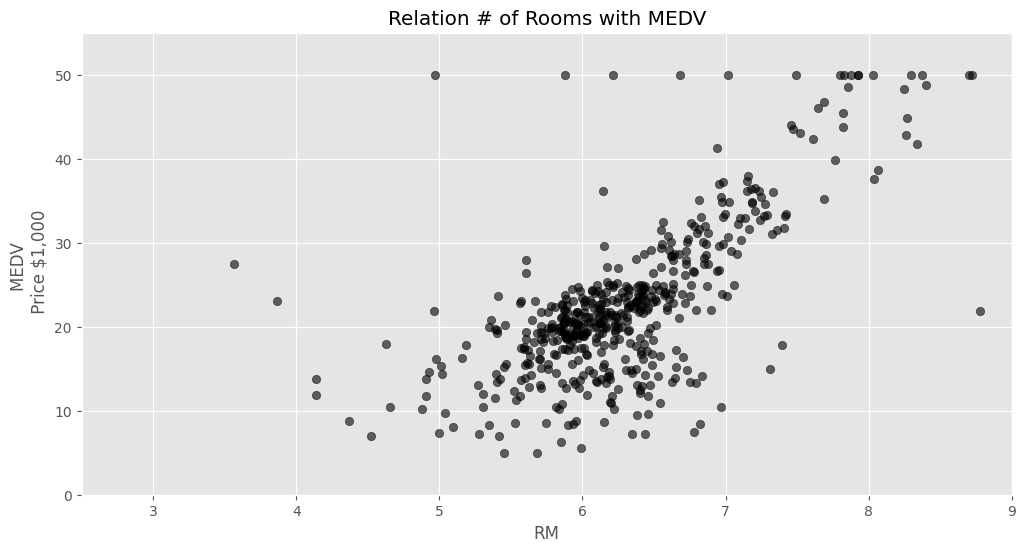

In [183]:
# 방의 개수와 집값 간의 관계를 산점도로 확인.

import matplotlib.pylab as plt
import matplotlib

matplotlib.style.use('ggplot')

fig, ax1 = plt.subplots(1,1, figsize = (12,6))

ax1.scatter(X['RM'], y, color='black', alpha=0.6)
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')

In [184]:
# 선형 모델을 이용해서 방 개수와 주택 가격 간의 관계를 구하는 코드

from sklearn import linear_model

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(X_train['RM']), y=y_train)
prediction = linear_regression.predict(X=pd.DataFrame(X_test['RM']))

print('a value: ', linear_regression.intercept_)
print('b value: ', linear_regression.coef_)
print('MEDV = {:.2f} * RM {:.2f}'.format(linear_regression.coef_[0], linear_regression.intercept_))


a value:  -36.24631889813795
b value:  [9.34830141]
MEDV = 9.35 * RM -36.25


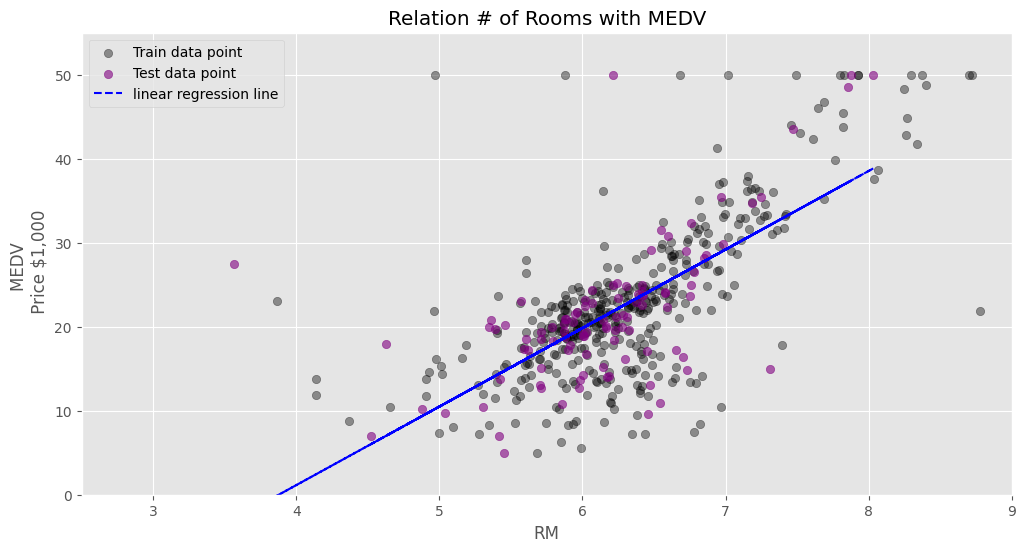

In [190]:
# 방의 개수가 달라질 때 주택 매매 가격을 예측하는 그래프와 데이터를 한꺼번에 플롯으로 그리는 코드

# scatter Train, Test data with Linear Regression Prediction
fig, ax1 = plt.subplots(1,1, figsize = (12,6))
ax1.scatter(X_train['RM'], y_train, color='black', alpha=0.4, label='Train data point')  # Train 데이터 (검은색)
ax1.scatter(X_test['RM'], y_test, color='purple', alpha=0.6, label='Test data point')  # Test 데이터 (보라색)
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')
ax1.plot(X_test['RM'], prediction, color='blue', alpha=1, linestyle='--', label='linear regression line')  # 회귀선(보라색)
ax1.legend()


In [186]:
# 모델 예측치와 실제 집값 간의 RMSE를 구하는 코드

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: %f" % (rmse))


RMSE: 6.792995


In [187]:
# 전체 피처를 사용해서 학습시킨 Xgboost 모델 생성.

import xgboost

# train XGBoost model
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)  # 학습 시 전체 피처 사용.
preds = model.predict(X_test)


In [170]:
# 전체 피처를 사용해서 학습시킨 Xgboost 모델의 RMSE를 구하는 코드

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 2.628542


In [201]:
# SHAP의 설명체를 정의하고 섀플리 값을 계산하는 로직

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
# (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])


In [202]:
y_train.iloc[0]

12.0

In [195]:
set(X_train[X_train['RM'] <= 5].index) & set(y_train[y_train >= 50].index)  # 방 크기가 5와 같거나 작은데 가격이 50 이상인 데이터 확인

{126}

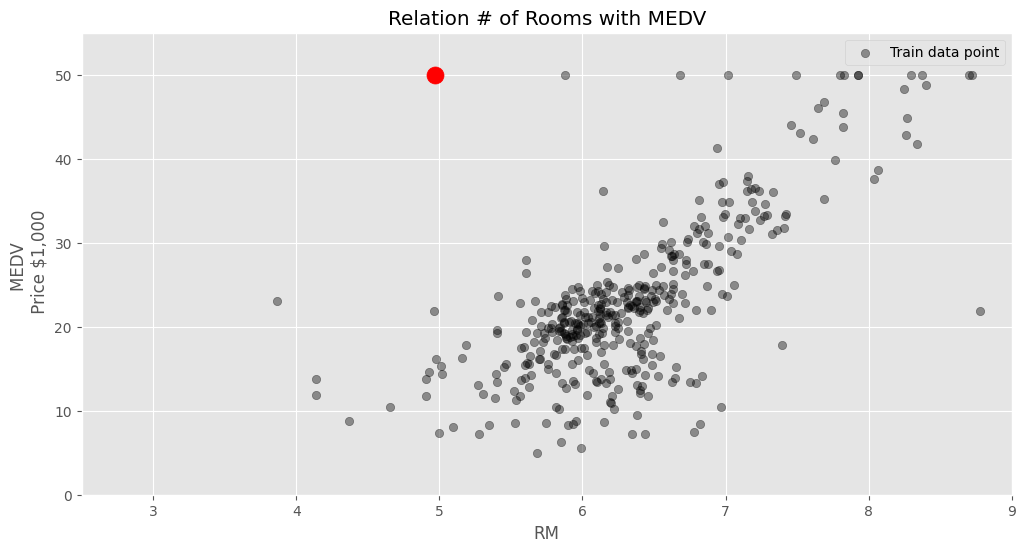

In [194]:
# scatter Train data with Outlier
fig, ax1 = plt.subplots(1,1, figsize = (12,6))
ax1.scatter(X_train['RM'], y_train, color='black', alpha=0.4, label='Train data point')  # Train 데이터 (검은색)
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')

ax1.scatter(X_train['RM'].loc[126], y_train.loc[126], c='red', s=150)
ax1.legend()


In [174]:
# 데이터 126번에 대한 섀플리 영향도를 그리는 코드

# load JS visualization code to notebook
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[126,:], X_train.loc[126,:])


In [175]:
# 전체 데이터에 대한 섀플리 값을 플롯으로 그리는 코드

# load JS visualization code to notebook
shap.initjs()

# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)


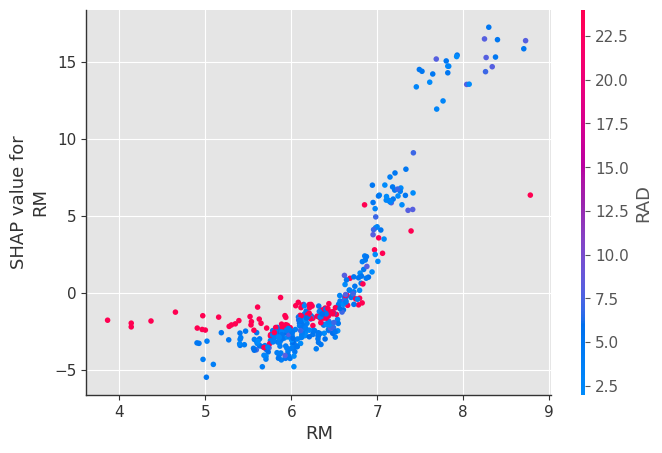

In [176]:
# 방 개수 피처가 집값에 미치는 섀플리 영향도를 시각화하는 플롯

# create a SHAP dependence plot to show the effect
# of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X_train)


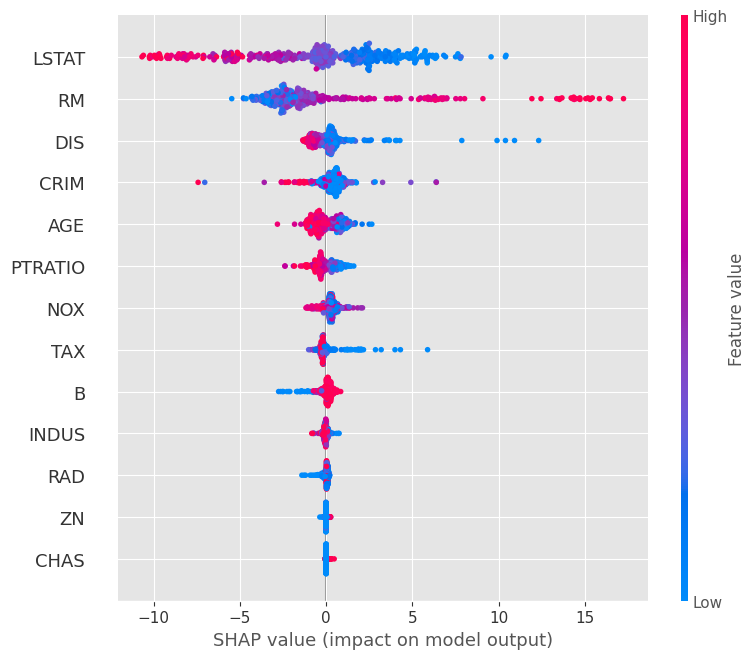

In [177]:
# 전체 피처들이 섀플리 값 결정에 어떻게 관여하는지 시각화하는 코드

# summarize the effects of all the features

shap.summary_plot(shap_values, X_train)

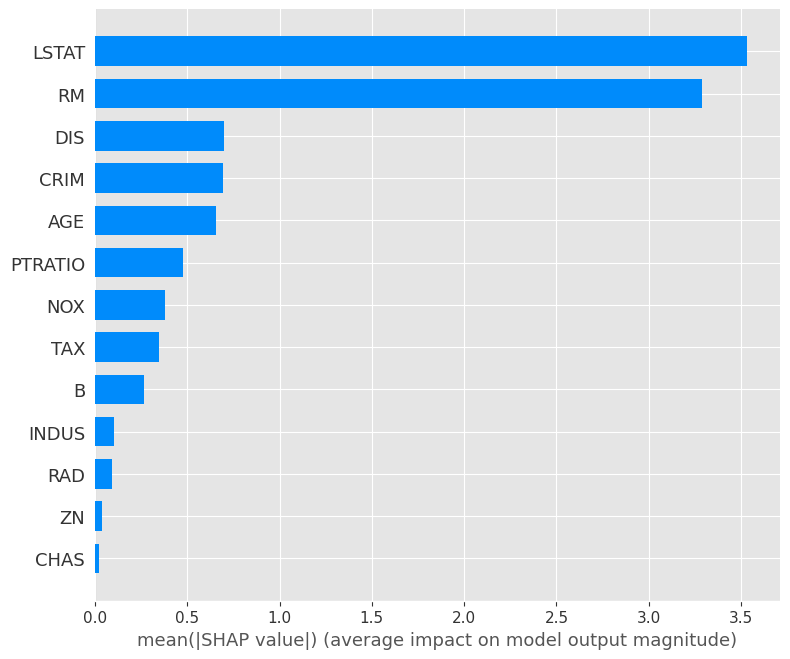

In [178]:
# 피처별 섀플리 값을 막대 타입으로 비교하는 코드

shap.summary_plot(shap_values, X_train, plot_type="bar")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

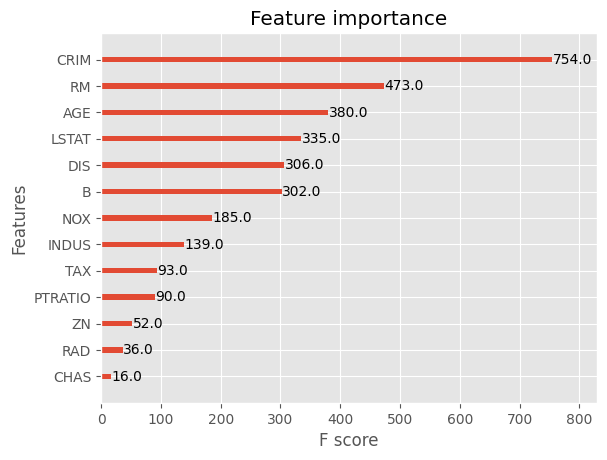

In [179]:
# Xgboost의 피처 중요도를 호출하는 코드

xgboost.plot_importance(model)
# 변수 별로 data를 분리하는데 쓰인 횟수.

# 실전 (LOAN DATA)

In [205]:
# dataload
loan_data = pd.read_csv("https://raw.githubusercontent.com/JaehyunAhn/XAI_dataset/master/Ch1.loan/loanData.csv")

* id: 고객 아이디  
* gender: 대출 신청자 성별  
* age: 대출 신청자 나이  
* married: 결혼 유무  
* dependents: 가족 수  
* education: 학력  
* self_employed: 자영업 유무  
* business_type: 국세청 기준 대출 신청인 업종 코드  
* applicant_income: 대출 신청인 수입  
* applicant_work_period: 대출 신청인 근무 기간  
* coapplicant_income: 배우자 수입  
* credit_history: 금융서비스(대출) 이용 횟수  
* credit_amount: 대출중인 금액  
* property_area: 주거지 종류(Urban: 도시, Semiurban: 준도시, Rural: 시골)  
* property_type: 주거지 소유 여부(1: 자가, 2: 월세, 3: 전세, 4: 기타)  
* credit_rate: 신용등급  
* loan_amount: 대출 금액    
* loan_term: 대출 상환 기간  
* loan_status: 대출 승인 여부  

In [206]:
loan_data[:3]

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001250,Male,55,Yes,3+,Not Graduate,No,88,4755,51,0.0,0.0,0,Semiurban,3,8,2090,0,0
1,LA001864,Male,68,Yes,3+,Not Graduate,No,14,4931,47,0.0,NaN,0,Semiurban,3,7,5376,24,0
2,LA002536,Male,43,Yes,3+,Not Graduate,No,56,3095,33,0.0,1.0,1382,Rural,3,5,3390,33,1


In [249]:
# 데이터 확인 (필요 시)
print(loan_data['gender'].unique())
print(loan_data['married'].unique())
print(loan_data['dependents'].unique())
print(loan_data['education'].unique())
print(loan_data['self_employed'].unique())
print(loan_data['business_type'].unique())
print(loan_data['credit_history'].unique())
print(loan_data['property_area'].unique())
print(loan_data['gender'].unique())


[ 1.  0. -1.]
[ 1.  0. -1.]
[ 3.  2.  1.  0. -1.]
[0 1]
[ 0.  1. -1.]
[88 14 56 46 60 80 21 66 30 64 42 94  4 45 26 76 74 35 43 59 11 29 61 78
 51 81 58 10 37 16 49 55 96 36 83 68 70 63 13 65 86 85 40 73 41 31 24 93
 27 15 97 82 47  3 87 53 91 48 71 84 89 33 67 57 52 90  5  1  2 28 77 79
 92 72 99 17 44 69 95 38 20 54 34  9  8 50 18  6 19 62 23 32 75 98 12 22
 25  7]
[ 0. nan  1.]
[2 3 1]
[ 1.  0. -1.]


In [250]:
gendr_mapping = {'Male': 1, 'Female': 0, np.nan: -1}
married_mapping = {'No': 0, 'Yes': 1, np.nan: -1}
dep_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3, np.nan: -1}
edu_mappiong = {'Graduate': 1, 'Not Graduate': 0}
emp_mapping = {'No': 0, 'Yes': 1, np.nan: -1}
prop_mapping = {'Urban': 1, 'Rural': 3, 'Semiurban': 2}
loan_data = loan_data.replace({'gender': gendr_mapping,
                               'married': married_mapping,
                               'dependents': dep_mapping,
                               'education': edu_mappiong,
                               'self_employed': emp_mapping,
                               'property_area': prop_mapping
                              })

In [251]:
loan_data[:3]


,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001250,1.0,55,1.0,3.0,0,0.0,88,4755,51,0.0,0.0,0,2,3,8,2090,0,0
1,LA001864,1.0,68,1.0,3.0,0,0.0,14,4931,47,0.0,NaN,0,2,3,7,5376,24,0
2,LA002536,1.0,43,1.0,3.0,0,0.0,56,3095,33,0.0,1.0,1382,3,3,5,3390,33,1


In [253]:
# X, y 분리 및 Train, Test 분리
X = loan_data.loc[:, 'gender':'loan_term']  # id 제외
y = loan_data.loc[:, 'loan_status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [254]:
# 초기 xgboost 모델 생성
import xgboost
model = xgboost.XGBClassifier()
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [255]:
# 모델 정확도 평가하는 함수 생성
from sklearn.metrics import accuracy_score
def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]

    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

In [256]:
# 모델 정확도 평가
calculate_accuracy(model, x_test, y_test)


Accuracy: 85.37%


0.8536585365853658

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

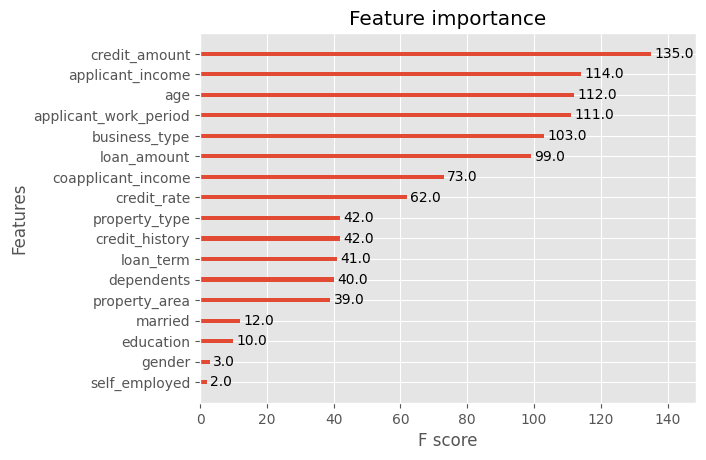

In [257]:
import xgboost
xgboost.plot_importance(model)

In [259]:
idx = 13

In [260]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value,
                shap_values[idx,:],
                x_train.iloc[idx,:])

In [265]:
idx = 15

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value,
                shap_values[idx,:],
                x_train.iloc[idx,:])

In [267]:
# visualize the training set predictions
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values, x_train)

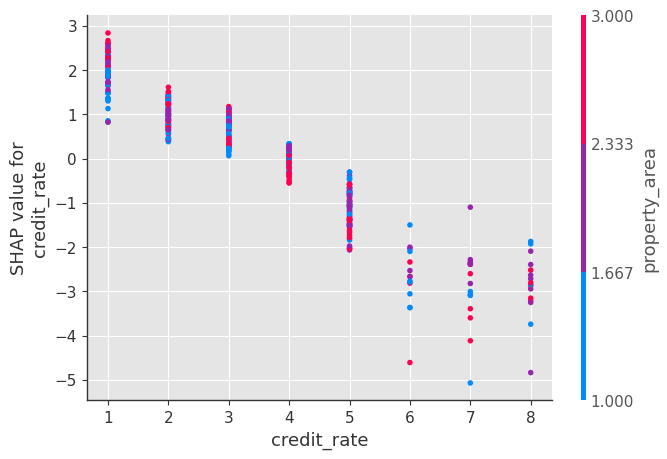

In [268]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("credit_rate", shap_values, x_train)

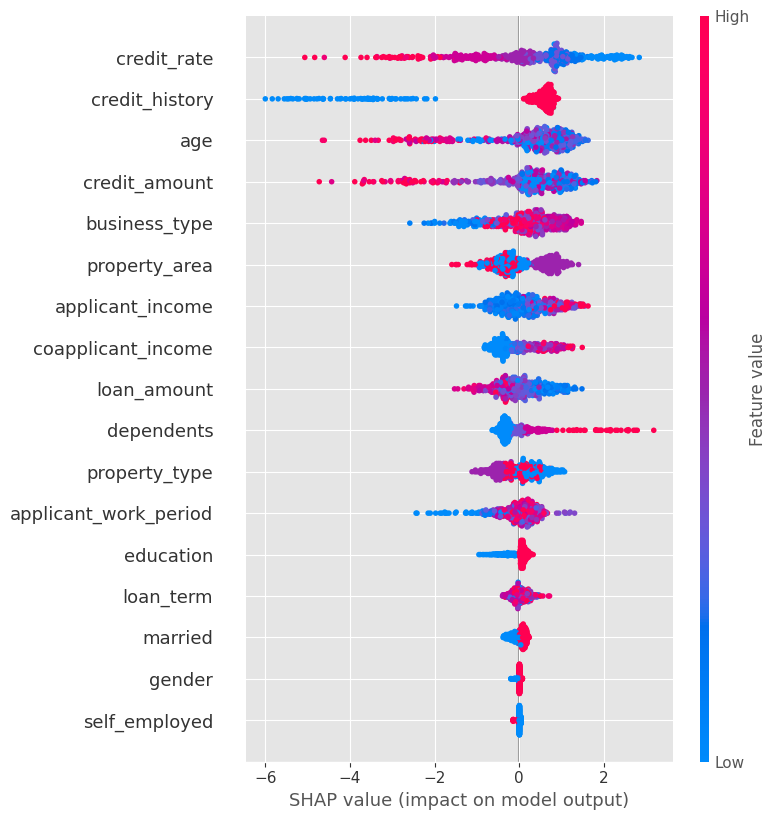

In [263]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)

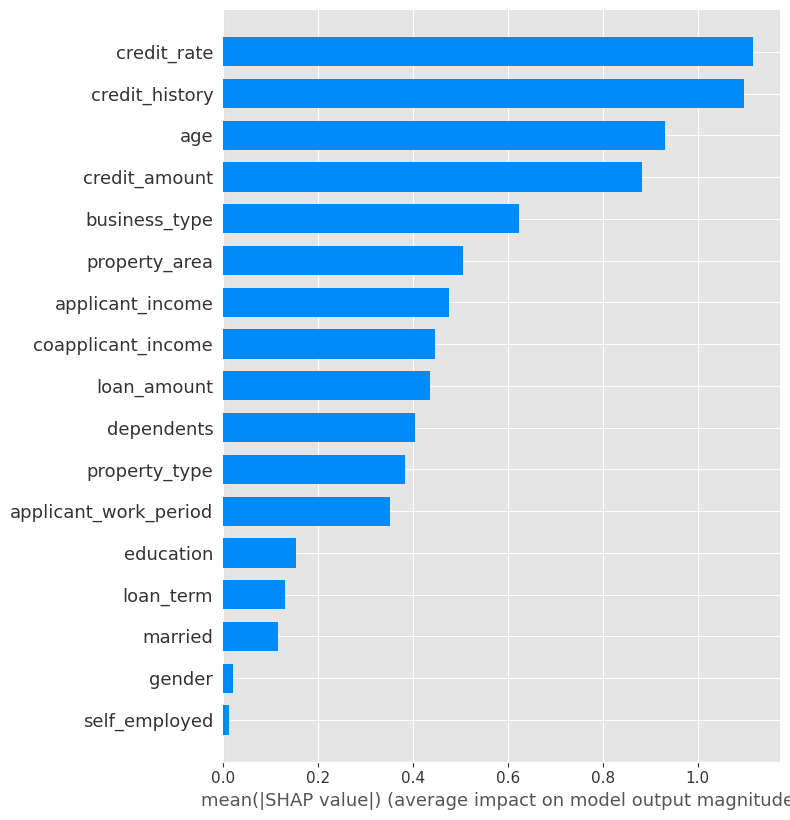

In [264]:
shap.summary_plot(shap_values, x_train, plot_type="bar")
